In [52]:
import pandas as pd
import numpy as np

from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
from dostoevsky.models import FastTextToxicModel
from pandas.tseries.offsets import MonthEnd

In [53]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)
df = pd.read_csv('feedback_last.csv',sep=';')
df.head()

Дата  Месяц   Год       ТН                            ФИО  \
0     1      1  2022  1119944  Котышев Дмитрий Александрович   
1     4      1  2022  1464503   \nМихеева Наталья Евгеньевна   
2     5      1  2022  1429434        Фролов Алексей Игоревич   
3     6      1  2022  1155423    Миронов Алексей Анатольевич   
4     8      1  2022    31346       Сабирова Нелли Мамедовна   

       Комментарий                                   Отзыв/предложение  \
0  Комментарий есть  Когда появится вкладка тесты и опросы 360, на ...   
1  Комментарий есть  удобство использования\nПрохожу сейчас учебу н...   
2  Комментарий есть  Добрый день. Где можно увидеть отельную програ...   
3  Комментарий есть  Я хотел бы в Пульсе работать с ноутбука с тем ...   
4  Комментарий есть  внешний вид См. Удобство интерфейса\nудобство ...   

         Статус           Действие Дозвон   SD Таска Раздел Доп. комментарий  \
0  Консультация  Отправлено письмо    NaN  NaN   NaN    NaN              NaN   
1  Консультация  Отправлено письмо    NaN  NaN   NaN    NaN              NaN   
2  Консультация  Отправлено письмо    NaN  NaN   NaN    NaN              NaN   
3  Консультация  Отправлено письмо    NaN  NaN   NaN    NaN              NaN   
4  Консультация  Отправлено письмо    NaN  NaN   NaN    NaN              NaN   

  Unnamed: 14  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [54]:
df.shape

(5393, 15)

In [55]:
df = df.dropna(subset=['Отзыв/предложение'])

In [56]:
df.shape

(5388, 15)

In [57]:
df['date'] = df['Год'].astype(str) + '.' + df['Месяц'].astype(str) + '.' + df['Дата'].astype(str)

In [58]:
df['date'] = pd.to_datetime(df['date'])

In [59]:
df['date'] = pd.to_datetime(df['date'], format="%Y%m") + MonthEnd(0)

In [60]:
feedback = list(df['Отзыв/предложение'])
list_of_feedback = []

In [61]:
for comment in feedback:
    for char in ['удобство использования', 'Добрый день!', 'Добрый день.', 'скорость работы', 
                 'доп. оценка', 'скорость работы', 'общий комментарий', 'внешний вид']:
        comment = comment.replace(char, "")
    list_of_feedback.append(comment.replace("\n", " "))

In [62]:
list_of_feedback

['Когда появится вкладка тесты и опросы 360, на айфоне уже давно она есть как пол года , на работе такой возможности нет пройти такой тест, неужели для этого мне покупать айфон, ради 1 теста!',
 ' Прохожу сейчас учебу на смартфоне. Нет возможности просматривать в альбомном расположении экрана. Сдать тесты вообще не реально. Такой мелкий шрифт просто не читается. Просьба исправить  Отметка о прохождении раздела курса не всегда устанавливается с первого раза. Надо перезайти в курс, чтобы раздел пометился как пройденный  Добавить возможность менять расположение экрана с книжного на альбомный при прохождении курсов учебы.',
 ' Где можно увидеть отельную программу для командировок? (ранее она выкладывалась в Альфе, мой Сбкрбанк)',
 'Я хотел бы в Пульсе работать с ноутбука с тем же функционалом как и на телефоне с установленным сертификатом. На ноутбуке требует установки VPN подключения для того же раздела "Мой доход и льготы", на телефоне не требует. Сертификаты УЦ стоят на обоих устройства

In [63]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)
sentiment_list = []
results = model.predict(list_of_feedback, k=2)
for sentiment in results:
    sentiment_list.append(sentiment)

In [64]:
neutral_list = []
negative_list = []
positive_list = []
speech_list = []
skip_list = []
for sentiment in sentiment_list:
    neutral = sentiment.get('neutral')
    negative = sentiment.get('negative')
    positive = sentiment.get('positive')
    speech = sentiment.get('speech')
    skip = sentiment.get('skip')
    if neutral is None:
        neutral_list.append(0)
    else:
        neutral_list.append(sentiment.get('neutral'))
    if negative is None:
        negative_list.append(0)
    else:
        negative_list.append(sentiment.get('negative'))
    if positive is None:
        positive_list.append(0)
    else:
        positive_list.append(sentiment.get('positive'))
        
    if speech is None:
        speech_list.append(0)
    else:
        speech_list.append(sentiment.get('speech'))  
    if skip is None:
        skip_list.append(0)
    else:
        skip_list.append(sentiment.get('skip'))    
df['neutral'] = neutral_list
df['negative'] = negative_list
df['positive'] = positive_list
df['speech'] = speech_list
df['skip'] = skip_list

In [65]:
df

Дата  Месяц   Год       ТН                             ФИО  \
0        1      1  2022  1119944   Котышев Дмитрий Александрович   
1        4      1  2022  1464503    \nМихеева Наталья Евгеньевна   
2        5      1  2022  1429434         Фролов Алексей Игоревич   
3        6      1  2022  1155423     Миронов Алексей Анатольевич   
4        8      1  2022    31346        Сабирова Нелли Мамедовна   
...    ...    ...   ...      ...                             ...   
5388    30      3  2023  1121099   Соловчук Сергей Александрович   
5389    31      3  2023  1923578  Ферулева Екатерина Анатольевна   
5390    31      3  2023  1919177        Головин Антон Васильевич   
5391    31      3  2023  1480312    Агеев Владимир Александрович   
5392    31      3  2023  1952198          Котик Антон Максимович   

          Комментарий                                   Отзыв/предложение  \
0     Комментарий есть  Когда появится вкладка тесты и опросы 360, на ...   
1     Комментарий есть  удобство использования\nПрохожу сейчас учебу н...   
2     Комментарий есть  Добрый день. Где можно увидеть отельную програ...   
3     Комментарий есть  Я хотел бы в Пульсе работать с ноутбука с тем ...   
4     Комментарий есть  внешний вид См. Удобство интерфейса\nудобство ...   
...                ...                                                ...   
5388  Комментарий есть  все хорошо\nудобство использования\nпри отклик...   
5389  Комментарий есть  Возможность выставить два диапазона дней, если...   
5390  Комментарий есть  Расшифровать категории тайм-менеджмента и прив...   
5391  Комментарий есть  добавить раздел, оценка рекрутера. после закры...   
5392  Комментарий есть  Добавить кнопку «Благодарность» или «спасибо» ...   

            Статус           Действие Дозвон  ... Таска  \
0     Консультация  Отправлено письмо    NaN  ...   NaN   
1     Консультация  Отправлено письмо    NaN  ...   NaN   
2     Консультация  Отправлено письмо    NaN  ...   NaN   
3     Консультация  Отправлено письмо    NaN  ...   NaN   
4     Консультация  Отправлено письмо    NaN  ...   NaN   
...            ...                ...    ...  ...   ...   
5388  Консультация  Отправлено письмо    NaN  ...   NaN   
5389   Предложение                NaN    Нет  ...   NaN   
5390  Консультация  Отправлено письмо    NaN  ...   NaN   
5391   Предложение                NaN    Нет  ...   NaN   
5392   Предложение                NaN    NaN  ...   NaN   

                           Раздел                       Доп. комментарий  \
0                             NaN                                    NaN   
1                             NaN                                    NaN   
2                             NaN                                    NaN   
3                             NaN                                    NaN   
4                             NaN                                    NaN   
...                           ...                                    ...   
5388  Подбор. Внутренний кандидат                                    NaN   
5389               Работа и отдых                            перезвонить   
5390                     Мой день                                    NaN   
5391  Подбор. Внутренний кандидат  нет ответа, уточнить целесообразность   
5392                    Поддержка                                    NaN   

     Unnamed: 14       date   neutral  negative  positive  speech      skip  
0            NaN 2022-01-31  0.803184  0.129413       0.0     0.0  0.000000  
1            NaN 2022-01-31  0.782673  0.095359       0.0     0.0  0.000000  
2            NaN 2022-01-31  0.672342  0.160276       0.0     0.0  0.000000  
3            NaN 2022-01-31  0.515630  0.370235       0.0     0.0  0.000000  
4            NaN 2022-01-31  0.760661  0.129413       0.0     0.0  0.000000  
...          ...        ...       ...       ...       ...     ...       ...  
5388           3 2023-03-31  0.928419  0.069552       0.0     0.0  0.000000  
5389           5 2

### проверим как модель определила процен негатива для комментариев с ручной разметкой

In [66]:
df_test = df[df['Статус']=='Негатив'][['ФИО', 'Отзыв/предложение', 'negative']]

In [67]:
df_test.to_csv('check.csv', index=False)

In [68]:
df_test

ФИО  \
47                   Чечина Ирина Юрьевна   
160         Филатова Анастасия Николаевна   
460             Лузанов Михаил Викторович   
674            Уткин Денис Владимирович\n   
685              Арбузова Анна Евгеньевна   
759          Беляев Антон Александрович\n   
849             Смирнова Ирина Николаевна   
941          Прудников Максим Сергеевич\n   
1020        Михайлова Лариса Владимировна   
1380          Доровская Анна Владимировна   
1984       Будехин Владимир Александрович   
2045              Морозова Анна Сергеевна   
2059              Зайцев Филипп Сергеевич   
2638          Трошин Алексей Вячеславович   
3382  Бурундукова Анастасия Александровна   
3737         Ежокина Лариса Александровна   
3818         Безрукова Олеся Владимировна   
4267           Федотов Сергей Анатольевич   
4482            Черняева Ирина Дмитриевна   
4522            Русаков Сергей Валерьевич   
4587           Гайсин Кирилл Всеволодович   
4973             Муратов Андрей Денисович   
5177              Кокина Светлана Юрьевна   
5305           Спорыхин Дмитрий Сергеевич   

                                      Отзыв/предложение  negative  
47    общий комментарий\nПротестируйте свою платформ...  0.160276  
160                               Все изменения ужасные  0.766304  
460   внешний вид\nочень плохо масштабирована страни...  0.926314  
674                                      ужасный сервис  0.787941  
685   Каталог обучения Отвратительно работает, посто...  0.712242  
759   Почему я не могу выбрать адрес Кутузовсий прос...  0.307368  
849   ДИБИЛЬНЫЙ ИНТЕРФЕЙС. ВСЁ ЧЕРНО-БЕЛО СИНЕЕ. КРИ...  0.300756  
941   Во первых давно пора уже оптимизировать все се...  0.577505  
1020     Ужасный тренажёр словно для умственно отсталых  0.822199  
1380  удобство использования\nвсё зависает и чтобы з...  0.000000  
1984  общий комментарий\nПриступить к своей работе!\...  0.314061  
2045  Отвратительная работа системы. Полноценно с от...  0.314061  
2059  Делайте по людски\nвнешний вид\nПолный отстой\...  0.930468  
2638  Это просто невозможно. Из месяца в месяц Прода...  0.228166  
3382  общий комментарий\nвсё.\nвнешний вид\nотвратит...  0.453272  
3737  ок\nудобство использования\nотвратительно долг...  0.275140  
3818  отвратительно работает зависает постоянно и ещ...  0.607673  
4267  Заказываю справку 2 раз. Первый раз заказывал ...  0.492198  
4482  Прошла собеседование. Приехала даже в СПБ чтоб...  0.414909  
4522  1) Сделайте кнопку "Сообщить об ошибке" не чер...  0.239359  
4587  лого; мб я конечно не в тренде граф дизайна, н...  0.362979  
4973  Ужас\nудобство использования\nВсе постоянно сб...  0.362979  
5177  УБЕРИТЕ ЭТОТ УРОДСКИЙ ПЕРЕЛИВАЮЩИЙСЯ ШАР С ЭКР...  0.212079  
5305  Угадай как отменить отпуск. Угадай как завести...  0.140346

In [69]:
df[df['negative']>0.70][['ФИО', 'Отзыв/предложение', 'negative']].to_csv('check_more_70.csv', index=False)

In [70]:
df[df['negative']>0.20][['ФИО', 'Отзыв/предложение', 'negative']].to_csv('check_more_20.csv', index=False)

In [71]:
df[df['Статус']=='Предложение'][['ФИО', 'Отзыв/предложение', 'negative']].to_csv('suppos.csv', index=False)

In [72]:
df = df.sort_values(by=['ТН'])

In [73]:
df[df['speech']>0.0]

Дата  Месяц   Год       ТН                              ФИО  \
779      3      4  2022    22755  \nГордеева Галина Александровна   
745      1      4  2022    25935      Аксенова Ольга Николаевна\n   
4654     5     12  2022    84971   Мельникова Мария Александровна   
4464    17     11  2022   101164          Гулло Лариса Викторовна   
457      9      3  2022   106872        Панов Александр Сергеевич   
...    ...    ...   ...      ...                              ...   
4058     5     10  2022  1945043           Кожан Андрей Андреевич   
3847    21      9  2022  1958722           Козлов Никита Игоревич   
5089     1      2  2023  1959201    Ветчинкин Александр Сергеевич   
4250    25     10  2022  1966110       Гаврилова Дарья Викторовна   
4651     5     12  2022  1967604        Ефремов Михаил Валерьевич   

          Комментарий                                   Отзыв/предложение  \
779   Комментарий есть           С 23 марта невозможно пройти видеорелизы   
745   Комментарий есть  Добрый вечер!При прохождении обучения в моб пр...   
4654  Комментарий есть  Добрый день, я проходила это обучение. По всей...   
4464  Комментарий есть  Добрый день, как посмотреть, кто из коллег пос...   
457   Комментарий есть  общий комментарий\nЗдравствуйте! в КУРСе был ф...   
...                ...                                                ...   
4058  Комментарий есть  Здравствуйте, я прошел все курсы по пожарной б...   
3847  Комментарий есть              Иногда скорость работы желает лучшего   
5089               NaN  Приятный UI, спасибо! Небольшое замечание - ре...   
4250  Комментарий есть  Проблемы с прохождением, не засчитывает пройде...   
4651  Комментарий есть   Помогло, спасибо) Можно убрать из рекомендаций?)   

                 Статус           Действие Дозвон  ... Таска  \
779        Консультация  Отправлено письмо    NaN  ...   NaN   
745        Консультация  Отправлено письмо    NaN  ...   NaN   
4654       Консультация  Отправлено письмо    NaN  ...   NaN   
4464       Консультация  Отправлено письмо    NaN  ...   NaN   
457        Консультация  Отправлено письмо    NaN  ...   NaN   
...                 ...                ...    ...  ...   ...   
4058       Консультация  Отправлено письмо    NaN  ...   NaN   
3847  Не требует ответа                NaN    NaN  ...   NaN   
5089       Консультация  Отправлено письмо    NaN  ...   NaN   
4250       Консультация  Отправлено письмо    NaN  ...   NaN   
4651       Консультация  Отправлено письмо    NaN  ...   NaN   

                                         Раздел Доп. комментарий Unnamed: 14  \
779                                         NaN              NaN         NaN   
745                                         NaN              NaN         NaN   
4654                                    Инсайты              NaN         NaN   
4464                                  Аналитика              NaN         NaN   
457                                         NaN              NaN         NaN   
...                                         ...              ...         ...   
4058                                    Инсайты              NaN         NaN   
3847  Согласие на обработку персональных данных              NaN         NaN   
5089  Согласие на обработку персональных данных              NaN         NaN   
4250                           Каталог обучения              NaN         NaN   
4651                                    Инсайты              NaN         NaN   

           date   neutral  negative  positive    speech      skip  
779  2022-04-30  0.989996       0.0  0.000000  0.013233  0.000000  
745  2022-04-30  0.948165       0.0  0.000000  0.080367  0.000000  
4654 2022-12-31  0.212079       0.0  0.000000  0.294225  0.000000  
4464 2022-11-30  0.000000       0.0  0.000000  0.863402  0.040856  
457  2022-03-31  0.461027       0.0  0.000000  0.050341  0.000000  
...         ...       ...       ...       ...       ...       ...  
4058 2022-10-31  0.607673       0.0  0.000000 

In [74]:
df_semantica = df[['ТН', 'neutral', 'negative', 'positive', 'speech', 'skip']]

In [75]:
df_semantica.to_csv('df_semantica.csv', index=False)

In [76]:
df_semantica

ТН   neutral  negative  positive  speech      skip
3154      4111  0.724880  0.100889  0.000000     0.0  0.000000
2620      4115  0.909917  0.119213  0.000000     0.0  0.000000
4404      4180  0.884049  0.125933  0.000000     0.0  0.000000
2672      4696  0.803184  0.307368  0.000000     0.0  0.000000
508       4807  0.863402  0.191943  0.000000     0.0  0.000000
...        ...       ...       ...       ...     ...       ...
5343   1983853  0.884049  0.082707  0.000000     0.0  0.000000
5237   1984100  0.577505  0.000000  0.000000     0.0  0.461027
5248   1984853  0.831153  0.399822  0.000000     0.0  0.000000
5313   1985666  0.461027  0.000000  0.000000     0.0  0.119213
1463  17759411  0.981463  0.000000  0.053413     0.0  0.000000

[5388 rows x 6 columns]

# Строим облако слов

#### https://habr.com/ru/post/517410/
#### https://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py
#### https://vc.ru/newtechaudit/309131-obzor-tokenizatorov-vhodyashchih-v-sostav-biblioteki-nltk

In [45]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pymorphy2
%matplotlib inline

In [46]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [47]:
def sky(df, title, normalize = False):
    clean_word_list = []
    list_of_feedback = []
    normalized_clean_list = []
    feedback = list(df['Отзыв/предложение'])
    
    spec_chars = string.punctuation + '\xa0«»\t—…' 
    for comment in feedback:
        for char in ['удобство использования', 'Добрый день!', 'Добрый день.', 'скорость работы', 
                     'доп. оценка', 'скорость работы', 'общий комментарий', 'внешний вид']:
            comment = comment.replace(char, "")
        list_of_feedback.append(comment.replace("\n", " "))
        
    text = ' '.join(list_of_feedback)
    text = text.lower()
    
    #удаления спец.символов, так и для удаления цифр из исходного текста:
    text = "".join([ch for ch in text if ch not in spec_chars])
    text = "".join([ch for ch in text if ch not in string.digits])
    
    russian_stopwords = stopwords.words("russian")
    russian_stopwords.extend(['это', 'добрый'])
    russian_stopwords.remove('не')
    
    clean_word_list = [word for word in text.split() if word not in russian_stopwords]
  
    if normalize == True:
        
        morph = pymorphy2.MorphAnalyzer()
        for word in clean_word_list:
                p = morph.parse(word)[0]  # делаем разбор
                normalized_clean_list.append(p.normal_form)
                
        normalized_clean_list = ' '.join(normalized_clean_list)  
        text_tokens = word_tokenize(normalized_clean_list)
    else:
        clean_word_list = ' '.join(clean_word_list)  
        text_tokens = word_tokenize(clean_word_list)
        
        
    tok = tokenize.MWETokenizer(separator=' ')
    tok.add_mwe(('очень', 'не', 'удобно'))
    tok.add_mwe(('очень', 'не', 'хватает'))
    tok.add_mwe(('не', 'очень', 'понятно'))
    tok.add_mwe(('очень', 'мелкий', 'шрифт'))
    tok.add_mwe(('очень', 'неудобно'))
    tok.add_mwe(('очень', 'удобно'))
    tok.add_mwe(('очень', 'удобный'))
    tok.add_mwe(('очень', 'хотеться'))
    tok.add_mwe(('очень', 'медленно'))
    tok.add_mwe(('очень', 'долго'))
    tok.add_mwe(('очень', 'сложно'))

    text_tokens = tok.tokenize(text_tokens)

    #строим график частотности
    text = nltk.Text(text_tokens)
    plt.figure(figsize=(10, 5))
    fdist = FreqDist(text)
    fdist.plot(20,cumulative=False)
    
    # строим облако
    text_raw = " ".join(text)
    x, y = np.ogrid[:300, :300]

    mask = (x - 150) ** 2 + (y - 150) ** 2 > 330 ** 2
    mask = 255 * mask.astype(int)


    wc = WordCloud(background_color="white", repeat=True, mask=mask)
    wc.generate(text_raw)

    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    fig = plt.gcf()
    plt.show()
    plt.draw()
    fig.savefig(f'Облако слов для {title}', dpi = 600)

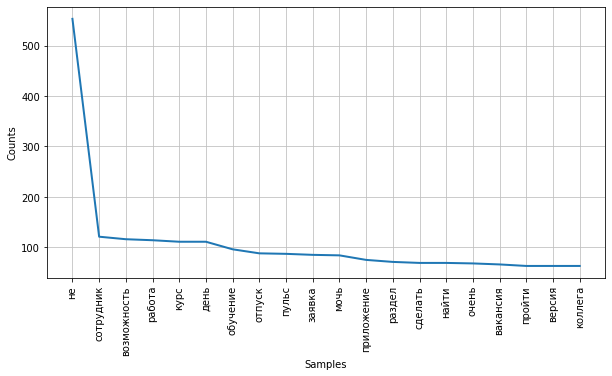

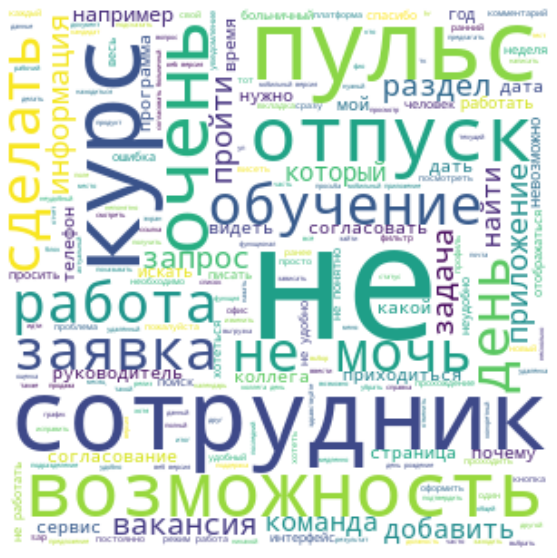

<Figure size 432x288 with 0 Axes>

In [48]:
sky(df=df[(df["Год"]==2022) & (df["Месяц"]<=3)], title = 'для всех комментариев 1 квартала 2022 года', normalize=True)

In [49]:
df[(df["Год"]==2022) & (df["Месяц"]<=3)].shape

(745, 21)

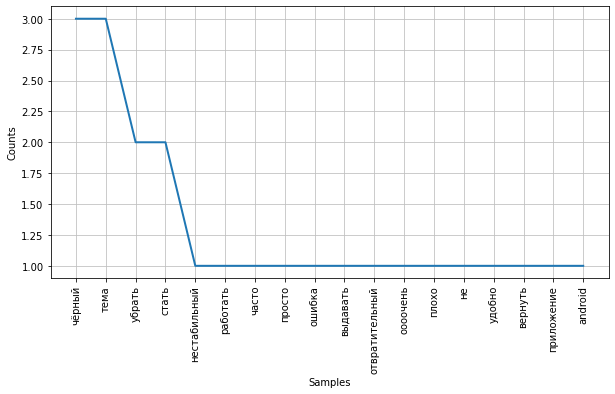

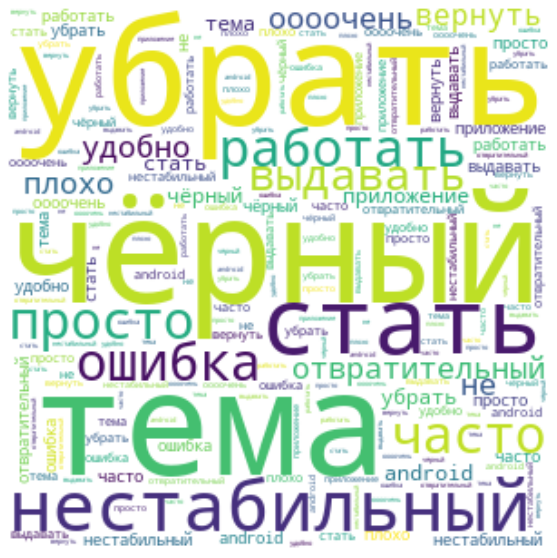

<Figure size 432x288 with 0 Axes>

In [50]:
sky(df=df[(df["Год"]==2023) & (df["Месяц"]<=3) & (df["negative"]>0.7)], title = 'для всех комментариев 1 квартала 2023 года', normalize=True)

In [51]:
df[(df["Год"]==2023) & (df["Месяц"]<=3)].shape

(532, 21)

In [45]:
df[(df["Год"]==2023) & (df["Месяц"]<=3) & (df["negative"]>0.4)].["Отзыв/предложение"]

4894    Убрать возможность анонимно оскорблять коллег ...
4898    Хочется более яркого интерфейса, либо каких-то...
4875    Давать обратную связь кандидату, почему его не...
5382    Добавить вид отсутствия (словами) - отпуск, бо...
4945    Дэшборды работают некорректно, очень часто не ...
5363                    Скорость, не всё сервисы дрступны
5108    Не работает, отсутствие обновлений\nудобство и...
5273    Уже 09 число. Ничего не подгружено за предыдущ...
5006    нет возможности увидеть...\nудобство использов...
4998         Опция отклонять сразу нескольких кандидатов.
5090    Зачем сделали чёрный фон, это отвратительно\nд...
5060    Не удаляется назначенное обучение, работает не...
5150    ПО ДНЯМ ВООБЩЕ НЕ ПОКАЗЫВАЕТ ПРОДАННЫЕ ПРОДУКТ...
4932    окно чата не закрывается\nскорость работы\n///...
4918    Не могу откликнуться на вакансию, так как выхо...
5255    сейчас не видно, что у меня активной стадии об...
5262    внешний вид\nстарая версия супер удобная, нова...
5327    работа

In [44]:
df[(df["Год"]==2023) & (df["Месяц"]<=3) & (df["negative"]>0.0)].shape

(376, 20)

<AxesSubplot:>

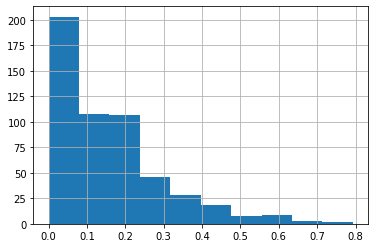

In [43]:
df[(df["Год"]==2023) & (df["Месяц"]<=3)].negative.hist()

<AxesSubplot:>

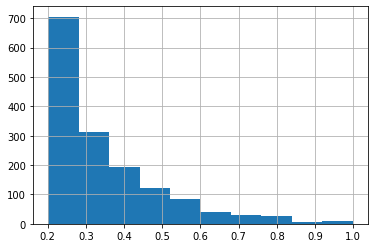

In [49]:
df[df["negative"]>0.2].negative.hist()

In [64]:
df[(df["negative"]>0.2) & (df['date']<'2023-03-31')].shape

(1495, 21)

In [76]:
df_neg = df[df["negative"]>0.5].groupby(['date'])['ТН'].count().reset_index()

In [31]:
df[df['date']>'2022-11-30'][['ФИО', 'Отзыв/предложение', 'date', 'negative']].sort_values(by=['date', 'negative'], ascending=True).to_excel('check_tail.xlsx', index=False)

ModuleNotFoundError: No module named 'openpyxl'

In [77]:
df_neg

date  ТН
0  2022-01-31   7
1  2022-02-28  14
2  2022-03-31  19
3  2022-04-30  26
4  2022-05-31  18
5  2022-06-30  25
6  2022-07-31  27
7  2022-08-31  25
8  2022-09-30  23
9  2022-10-31  10
10 2022-11-30   4
11 2022-12-31  10
12 2023-01-31  10
13 2023-02-28   4
14 2023-03-31   8

In [67]:
df_all = df.groupby(['date'])['ТН'].count().reset_index()

In [68]:
df_all

date   ТН
0  2022-01-31  149
1  2022-02-28  231
2  2022-03-31  365
3  2022-04-30  595
4  2022-05-31  451
5  2022-06-30  566
6  2022-07-31  641
7  2022-08-31  489
8  2022-09-30  506
9  2022-10-31  307
10 2022-11-30  315
11 2022-12-31  241
12 2023-01-31  214
13 2023-02-28  168
14 2023-03-31  150

In [11]:
df_tail = pd.read_csv('check_tail_res.csv',sep=';')

In [15]:
df_tail[df_tail["hands"]==1].groupby(['date'])['ФИО'].count().reset_index()

date  ФИО
0  2022-12-31   99
1  2023-01-31   88
2  2023-02-28   81
3  2023-03-31   56

In [16]:
df_tail.groupby(['date'])['ФИО'].count().reset_index()

date  ФИО
0  2022-12-31  241
1  2023-01-31  214
2  2023-02-28  168
3  2023-03-31  150

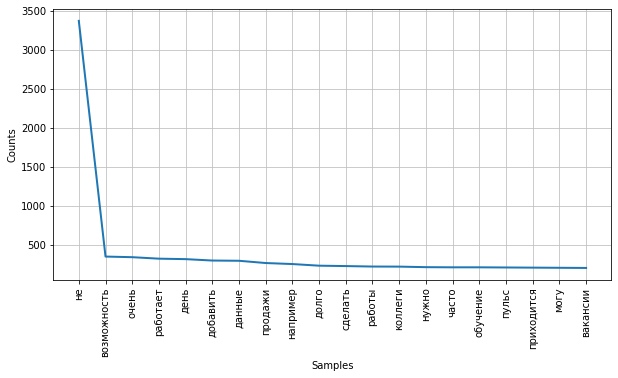

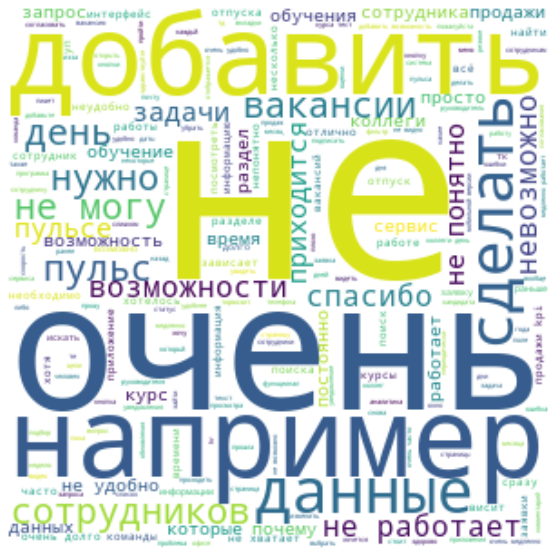

<Figure size 432x288 with 0 Axes>

In [30]:
sky(df=df, title = 'для всех комментариев', normalize=False)

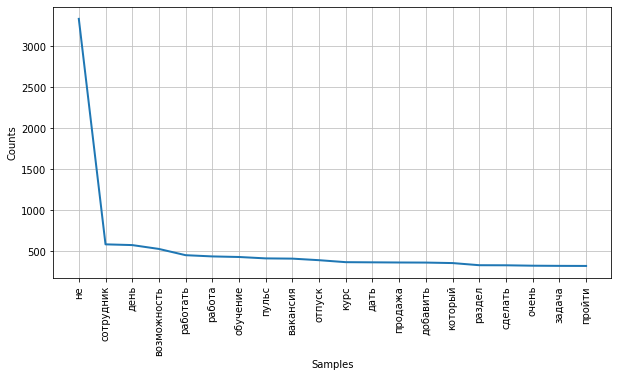

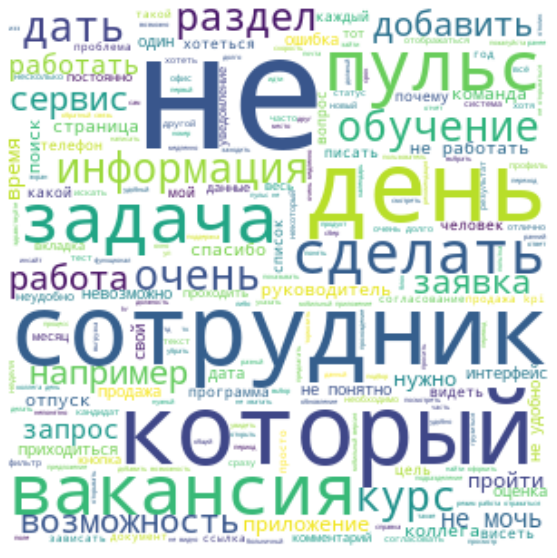

<Figure size 432x288 with 0 Axes>

In [127]:
sky(df=df, title = 'для всех комментариев с нормализацией', normalize=True)

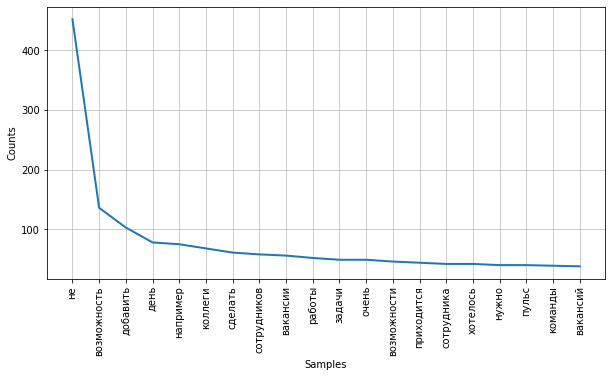

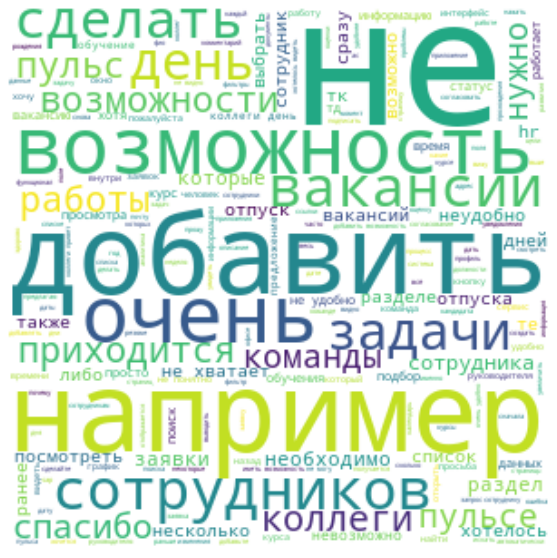

<Figure size 432x288 with 0 Axes>

In [131]:
sky(df=df[df['Статус']=='Предложение'][['ФИО', 'Отзыв/предложение', 'negative']], title = 'для комментариев типа предложение', normalize=False)

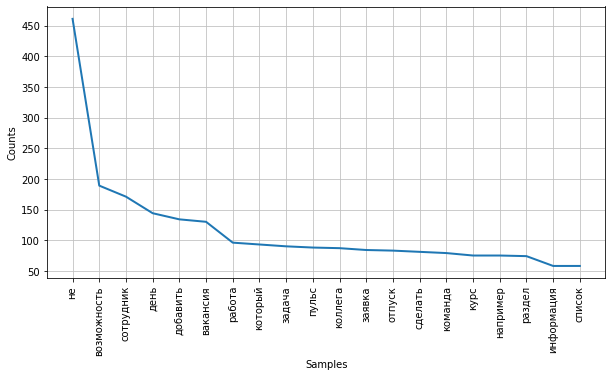

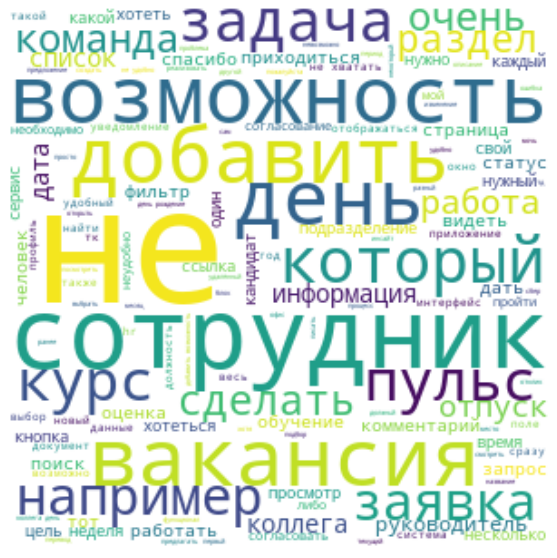

<Figure size 432x288 with 0 Axes>

In [132]:
sky(df=df[df['Статус']=='Предложение'][['ФИО', 'Отзыв/предложение', 'negative']], title = 'для комментариев типа предложение с нормализацией', normalize=True)

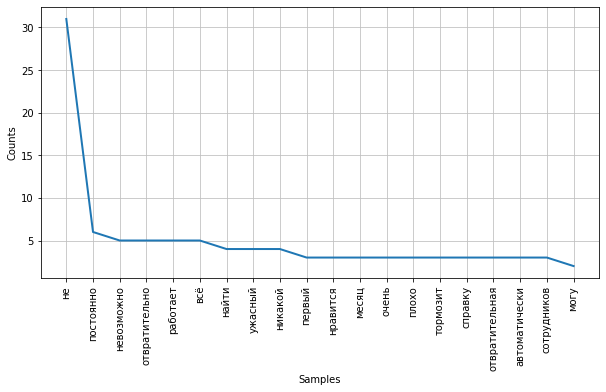

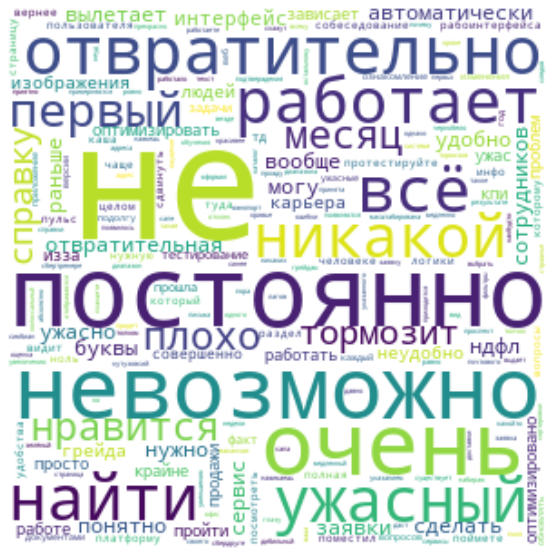

<Figure size 432x288 with 0 Axes>

In [120]:
sky(df=df_test, title = 'ручная разметка негативных', normalize=False)

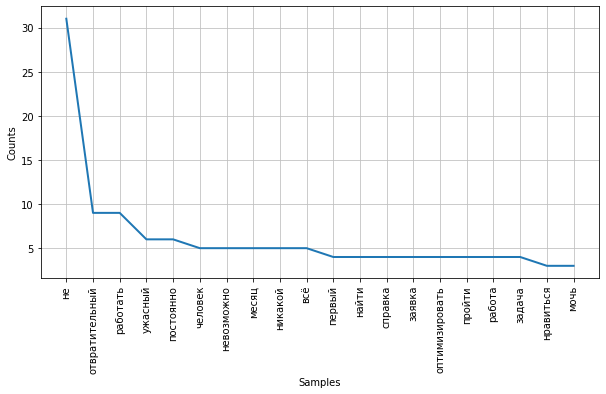

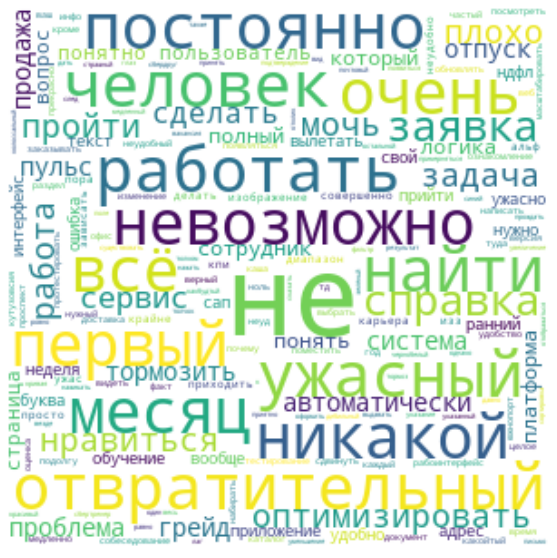

<Figure size 432x288 with 0 Axes>

In [121]:
sky(df=df_test, title = 'ручная разметка негативных с нормализацией', normalize=True)

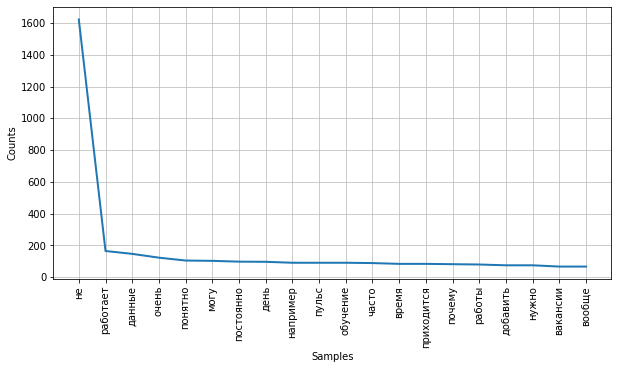

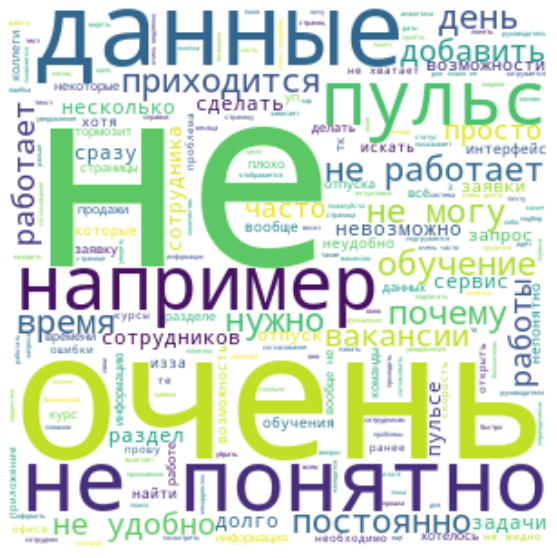

<Figure size 432x288 with 0 Axes>

In [122]:
sky(df=df[df['negative']>0.20][['ФИО', 'Отзыв/предложение', 'negative']], title = 'негатива больше 20%', normalize=False)

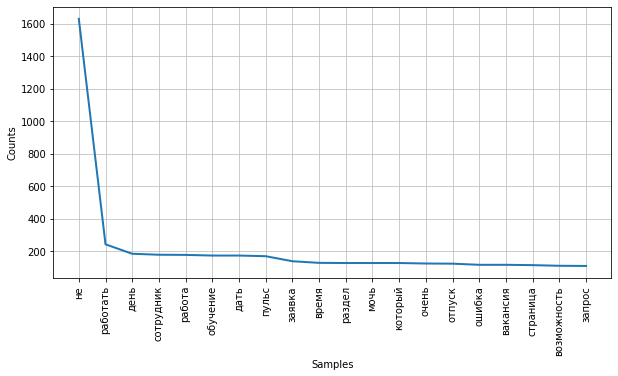

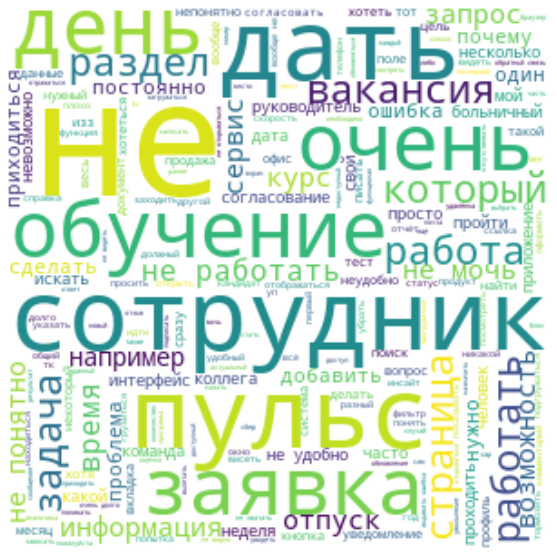

<Figure size 432x288 with 0 Axes>

In [123]:
sky(df=df[df['negative']>0.20][['ФИО', 'Отзыв/предложение', 'negative']], title = 'негатива больше 20% с нормализацией', normalize=True)

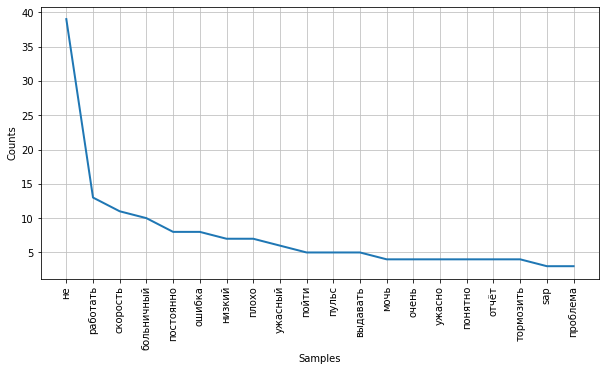

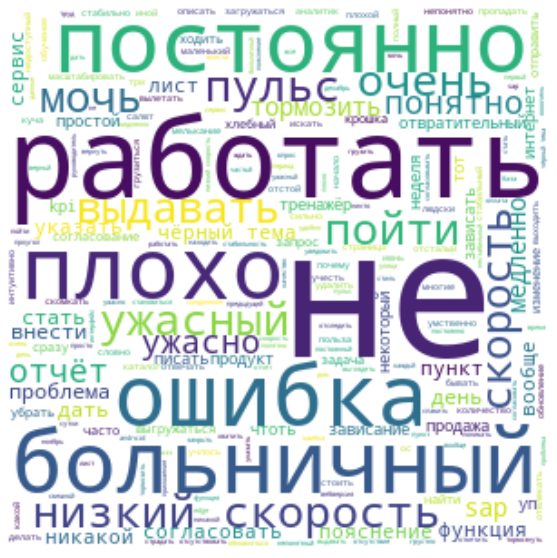

<Figure size 432x288 with 0 Axes>

In [124]:
sky(df=df[df['negative']>0.70][['ФИО', 'Отзыв/предложение', 'negative']], title = 'негатива больше 70% с нормализацией', normalize=True)

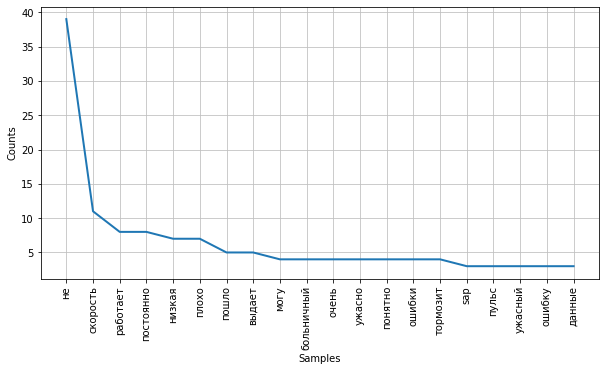

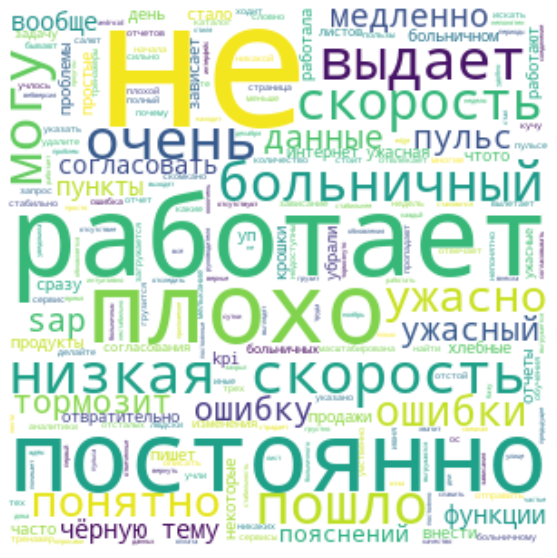

<Figure size 432x288 with 0 Axes>

In [125]:
sky(df=df[df['negative']>0.70][['ФИО', 'Отзыв/предложение', 'negative']], title = 'негатива больше 70%', normalize=False)

In [36]:
spec_chars = string.punctuation + '\xa0«»\t—…' 

In [37]:
feedback = list(df['Отзыв/предложение'])
clean_word_list = []
list_of_feedback = []
normalized_clean_list = []

In [38]:
for comment in feedback:
    for char in ['удобство использования', 'Добрый день!', 'Добрый день.', 'скорость работы', 
                 'доп. оценка', 'скорость работы', 'общий комментарий', 'внешний вид']:
        comment = comment.replace(char, "")
    list_of_feedback.append(comment.replace("\n", " "))

In [39]:
text = ' '.join(list_of_feedback)

In [40]:
text = text.lower()

In [41]:
#удаления спец.символов, так и для удаления цифр из исходного текста:
text = "".join([ch for ch in text if ch not in spec_chars])
text = "".join([ch for ch in text if ch not in string.digits])

In [42]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

In [43]:
russian_stopwords.extend(['это', 'добрый'])

In [44]:
russian_stopwords.remove('не')


In [45]:
clean_word_list = [word for word in text.split() if word not in russian_stopwords]

In [51]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [52]:
for word in clean_word_list:
            p = morph.parse(word)[0]  # делаем разбор
            normalized_clean_list.append(p.normal_form)


NameError: name 'clean_word_list' is not defined

In [49]:
normalized_clean_list = ' '.join(normalized_clean_list)

In [51]:
normalized_clean_list

'появиться вкладка тест опрос айфон давно пол год работа возможность пройти тест неужели покупать айфон ради тест проходить учёба смартфон возможность просматривать альбомный расположение экран сдать тест вообще не реально мелкий шрифт просто не читаться просьба исправить отметка прохождение раздел курс не устанавливаться первый раз перезайти курс раздел пометиться пройти добавить возможность менять расположение экран книжный альбомный прохождение курс учёба увидеть отельный программа командировка ранее выкладываться альф сбкрбанк хотеть пульс работать ноутбук функционал телефон установленный сертификат ноутбук требовать установка vpn подключение раздел доход льгота телефон не требовать сертификат уц стоять оба устройство смотреть удобство интерфейс неудобно проходить обучать курс мобильный приложение например курс эмоциональный клей очень интересный альбомный ориентация мобильный версия приходиться время увеличивать текст значок настройка телефон исправный to backlog вне зависимость в

In [71]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


KeyboardInterrupt: 

In [66]:
from nltk import word_tokenize
from nltk import tokenize
text_tokens = word_tokenize(normalized_clean_list)

In [67]:
text_tokens[:5]

['появиться', 'вкладка', 'тест', 'опрос', 'айфон']

In [68]:
tok = tokenize.MWETokenizer(separator=' ')
tok.add_mwe(('очень', 'не', 'удобно'))
tok.add_mwe(('очень', 'не', 'хватает'))
tok.add_mwe(('не', 'очень', 'понятно'))
tok.add_mwe(('очень', 'мелкий', 'шрифт'))
tok.add_mwe(('очень', 'неудобно'))
tok.add_mwe(('очень', 'удобно'))
tok.add_mwe(('очень', 'удобный'))
tok.add_mwe(('очень', 'хотеться'))
tok.add_mwe(('очень', 'медленно'))
tok.add_mwe(('очень', 'долго'))
tok.add_mwe(('очень', 'сложно'))



In [69]:
import nltk
text = nltk.Text(text_tokens)

In [70]:
text[:3]

['появиться', 'вкладка', 'тест']

In [71]:
from nltk.probability import FreqDist
fdist = FreqDist(text)

In [72]:
fdist

FreqDist({'не': 3360, 'очень': 637, 'сотрудник': 585, 'день': 576, 'возможность': 529, 'работать': 453, 'работа': 438, 'обучение': 431, 'пульс': 414, 'вакансия': 411, ...})

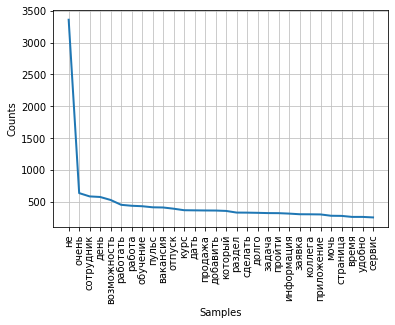

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [73]:
fdist.plot(30,cumulative=False)

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
text_raw = " ".join(text)

In [76]:
text_raw

'появиться вкладка тест опрос айфон давно пол год работа возможность пройти тест неужели покупать айфон ради тест проходить учёба смартфон возможность просматривать альбомный расположение экран сдать тест вообще не реально мелкий шрифт просто не читаться просьба исправить отметка прохождение раздел курс не устанавливаться первый раз перезайти курс раздел пометиться пройти добавить возможность менять расположение экран книжный альбомный прохождение курс учёба увидеть отельный программа командировка ранее выкладываться альф сбкрбанк хотеть пульс работать ноутбук функционал телефон установленный сертификат ноутбук требовать установка vpn подключение раздел доход льгота телефон не требовать сертификат уц стоять оба устройство смотреть удобство интерфейс неудобно проходить обучать курс мобильный приложение например курс эмоциональный клей очень интересный альбомный ориентация мобильный версия приходиться время увеличивать текст значок настройка телефон исправный to backlog вне зависимость в

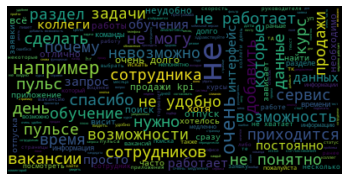

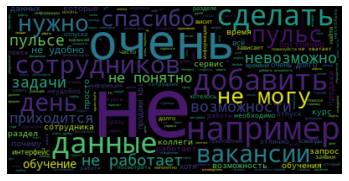

In [259]:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=100).generate(text_raw)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

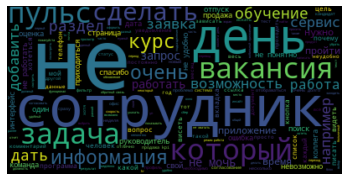

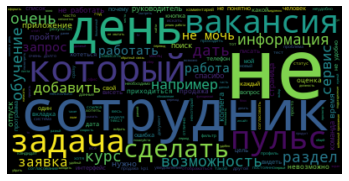

In [78]:
wordcloud = WordCloud(max_font_size=100).generate(text_raw)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# lower max_font_size
wordcloud = WordCloud(max_font_size=100).generate(text_raw)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

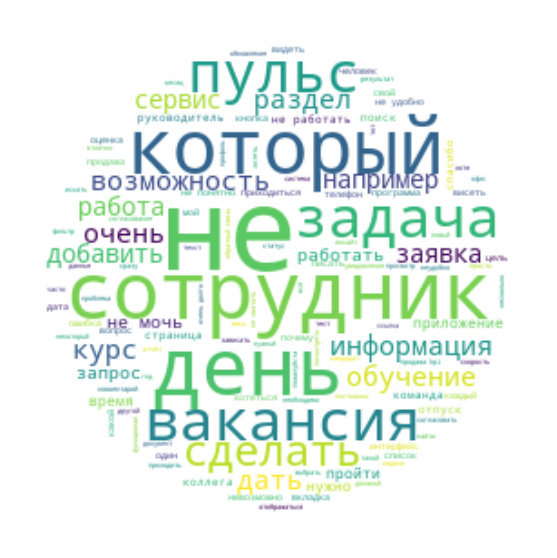

/Users/19811785/PycharmProjects/testing/venv/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

In [84]:


x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(text_raw)


plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig('облако слов.png', quality = 100)